# Logistic regression for binary classification

## import libraries

In [192]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

## load data

In [193]:
directory_data  = './data/'
filename_data   = 'assignment_02_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x = data['x']
y = data['y']

print('size of x (image) :', x.shape)
print('size of y (label) :', y.shape)

print('number of image :', x.shape[0])
print('height of image :', x.shape[1])
print('width of image :', x.shape[2])
im_0    = x[0,:,:]
im_1    = x[1,:,:]
label_0 = y[0]
label_1 = y[1]



size of x (image) : (2, 28, 28)
size of y (label) : (2,)
number of image : 2
height of image : 28
width of image : 28


## plot data

In [194]:
def plot_data2(title1, data1, title2, data2):

    fig = plt.figure(figsize=(8,4))

    rows = 1
    cols = 2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.set_title(title1)
    ax1.imshow(data1, cmap='gray', vmin=0, vmax=1)

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.set_title(title2)
    ax2.imshow(data2, cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

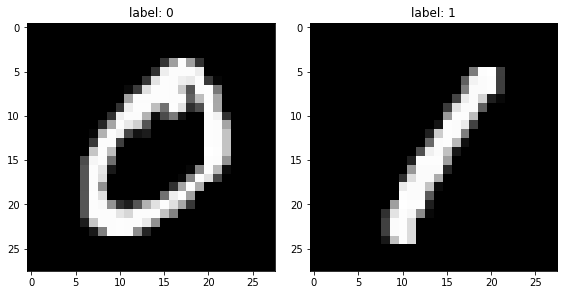

In [195]:
plot_data2('label: 0', im_0, 'label: 1', im_1)

## convert gray scale image to color

In [196]:
im_0_red    = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_green  = np.zeros((im_0.shape[0], im_0.shape[1], 3))
im_0_blue   = np.zeros((im_0.shape[0], im_0.shape[1], 3))

im_1_red    = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_green  = np.zeros((im_1.shape[0], im_1.shape[1], 3))
im_1_blue   = np.zeros((im_1.shape[0], im_1.shape[1], 3))

im_0_red[:,:,0]     = im_0
im_0_green[:,:,1]   = im_0
im_0_blue[:,:,2]    = im_0

im_1_red[:,:,0]     = im_1
im_1_green[:,:,1]   = im_1
im_1_blue[:,:,2]    = im_1

print(im_0_red.shape)
print(im_0_green.shape)
print(im_0_blue.shape)

print(im_1_red.shape)
print(im_1_green.shape)
print(im_1_blue.shape)


(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


## plot color data

In [197]:
def plot_data_color3(title1, data1, title2, data2, title3, data3):

    fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(12, 4))

    axes[0].imshow(data1, vmin=0, vmax=1)
    axes[0].set(title=title1)
    
    axes[1].imshow(data2, vmin=0, vmax=1)
    axes[1].set(title=title2)
    
    axes[2].imshow(data3, vmin=0, vmax=1)
    axes[2].set(title=title3)

    plt.show()


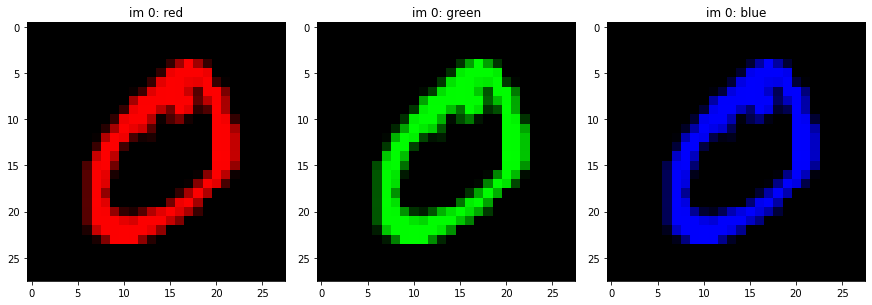

In [198]:
plot_data_color3('im 0: red', im_0_red, 'im 0: green', im_0_green, 'im 0: blue', im_0_blue)

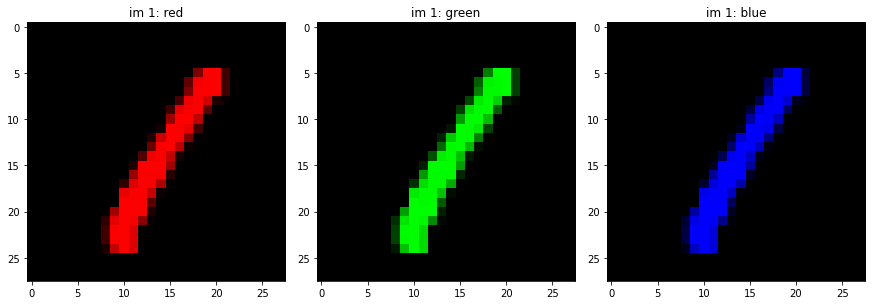

In [199]:
plot_data_color3('im 1: red', im_1_red, 'im 1: green', im_1_green, 'im 1: blue', im_1_blue)

## linear layer

In [214]:
def layer_linear(input, weight):
    
    # fill in the function body
    output = np.dot(input, weight)
    # -------------------------

    return output

## [git commit # 01] % git commit -a -m "complete the function for linear layer"

## activation function : Sigmoid

In [220]:
def activation_sigmoid(input):
    
    # fill in the function body
    output = 1 / (1 + np.exp(-input))
    # -------------------------

    return output

## [git commit # 02] % git commit -a -m "complete the function for the sigmoid activation"

## forward propagation 

In [221]:
def propagation_forward(input, weight):
    
    # fill in the function body
    output      = activation_sigmoid(layer_linear(input, weight))
    prediction  = np.where(output < 0.5, 0, 1)
    # -------------------------

    return prediction

## [git commit # 03] % git commit -a -m "complete the function for the forward propagation"

## compute loss function

In [219]:
def compute_loss(input, weight, label):

    # fill in the function body
    prediction      = activation_sigmoid(layer_linear(input, weight))
    loss            = -(label * np.log(prediction) + (1-label) * np.log(1-prediction))
    loss_average    = np.sum(loss) / loss.size
    # -------------------------

    return loss_average

## [git commit # 04] % git commit -a -m "complete the function for the loss"

## compute gradient

In [247]:
def compute_gradient(input, weight, label):

    # fill in the function body
    prediction  = activation_sigmoid(layer_linear(input, weight))
    residual    = prediction - label
    gradient    = np.multiply(residual.reshape(len(input),1), input)
    # -------------------------

    return gradient

## [git commit # 05] % git commit -a -m "complete the function for the computation of gradient"

## initialize weight

In [241]:
weight  = np.ones(np.prod(im_0.shape))
weight  = weight * 0.001

vector_0    = np.matrix.flatten(im_0)
vector_1    = np.matrix.flatten(im_1)
input   = [vector_0, vector_1]
label   = y

(784,)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [206]:
number_iteration    = 1000
learning_rate       = 0.01

## gradient descent

In [254]:
loss_iteration      = np.zeros(number_iteration)
pred_0_iteration    = np.zeros(number_iteration) 
pred_1_iteration    = np.zeros(number_iteration) 

for i in range(number_iteration):

    # fill in the function body
    sum_of_gradient = np.sum(compute_gradient(input, weight, label), axis=0)
    weight  = weight - learning_rate * sum_of_gradient / len(input)
    loss    = compute_loss(input, weight, label)
    pred    = propagation_forward(input,weight)
    # -------------------------

    loss_iteration[i]   = loss
    pred_0_iteration[i] = pred[0]
    pred_1_iteration[i] = pred[1]
    
    # print('iteration = %4d, loss = %5.5f' % (i, loss))

## [git commit # 06] % git commit -a -m "complete the function for the gradient descent"

## plot learning curve

In [ ]:
def plot_curve(title, data):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(data, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_curve('loss', loss_iteration)

## plot prediction values

In [ ]:
def plot_curve2(title, data1, label1, data2, label2):


    fig = plt.figure(figsize=(8,6))
    plt.title(title)

    plt.plot(data1, '-', color='blue', label=label1)
    plt.plot(data2, '-', color='red', label=label2)
    plt.legend()
    plt.tight_layout()

    plt.show()

In [ ]:
plot_curve2('prediction', pred_0_iteration, 'im 0', pred_1_iteration, 'im 1')

## given iterations at which the values are presented

In [ ]:
iter0   = 0
iter1   = 100
iter2   = 200
iter3   = 300
iter4   = 400
iter5   = 500
iter6   = 600
iter7   = 700
iter8   = 800
iter9   = 900


## loss values

In [ ]:
print('iteration = %4d, loss = %12.10f' % (iter0, loss_iteration[iter0]))
print('iteration = %4d, loss = %12.10f' % (iter1, loss_iteration[iter1]))
print('iteration = %4d, loss = %12.10f' % (iter2, loss_iteration[iter2]))
print('iteration = %4d, loss = %12.10f' % (iter3, loss_iteration[iter3]))
print('iteration = %4d, loss = %12.10f' % (iter4, loss_iteration[iter4]))
print('iteration = %4d, loss = %12.10f' % (iter5, loss_iteration[iter5]))
print('iteration = %4d, loss = %12.10f' % (iter6, loss_iteration[iter6]))
print('iteration = %4d, loss = %12.10f' % (iter7, loss_iteration[iter7]))
print('iteration = %4d, loss = %12.10f' % (iter8, loss_iteration[iter8]))
print('iteration = %4d, loss = %12.10f' % (iter9, loss_iteration[iter9]))

## prediction values for im_0

In [ ]:
print('iteration = %4d, pred im0 = %12.10f' % (iter0, pred_0_iteration[iter0]))
print('iteration = %4d, pred im0 = %12.10f' % (iter1, pred_0_iteration[iter1]))
print('iteration = %4d, pred im0 = %12.10f' % (iter2, pred_0_iteration[iter2]))
print('iteration = %4d, pred im0 = %12.10f' % (iter3, pred_0_iteration[iter3]))
print('iteration = %4d, pred im0 = %12.10f' % (iter4, pred_0_iteration[iter4]))
print('iteration = %4d, pred im0 = %12.10f' % (iter5, pred_0_iteration[iter5]))
print('iteration = %4d, pred im0 = %12.10f' % (iter6, pred_0_iteration[iter6]))
print('iteration = %4d, pred im0 = %12.10f' % (iter7, pred_0_iteration[iter7]))
print('iteration = %4d, pred im0 = %12.10f' % (iter8, pred_0_iteration[iter8]))
print('iteration = %4d, pred im0 = %12.10f' % (iter9, pred_0_iteration[iter9]))

## prediction values for im_1

In [ ]:
print('iteration = %4d, pred im1 = %12.10f' % (iter0, pred_1_iteration[iter0]))
print('iteration = %4d, pred im1 = %12.10f' % (iter1, pred_1_iteration[iter1]))
print('iteration = %4d, pred im1 = %12.10f' % (iter2, pred_1_iteration[iter2]))
print('iteration = %4d, pred im1 = %12.10f' % (iter3, pred_1_iteration[iter3]))
print('iteration = %4d, pred im1 = %12.10f' % (iter4, pred_1_iteration[iter4]))
print('iteration = %4d, pred im1 = %12.10f' % (iter5, pred_1_iteration[iter5]))
print('iteration = %4d, pred im1 = %12.10f' % (iter6, pred_1_iteration[iter6]))
print('iteration = %4d, pred im1 = %12.10f' % (iter7, pred_1_iteration[iter7]))
print('iteration = %4d, pred im1 = %12.10f' % (iter8, pred_1_iteration[iter8]))
print('iteration = %4d, pred im1 = %12.10f' % (iter9, pred_1_iteration[iter9]))

In [ ]:
def function_result_01(*args):

    pass

## [git commit # 07] % git commit -a -m "complete the function for the function result 01"

In [ ]:
def function_result_02(*args):

    pass

## [git commit # 08] % git commit -a -m "complete the function for the function result 02"

In [ ]:
def function_result_03(*args):
    
    pass

## [git commit # 09] % git commit -a -m "complete the function for the function result 03"

In [ ]:
def function_result_04(*args):

    pass

## [git commit # 10] % git commit -a -m "complete the function for the function result 04"

In [ ]:
def function_result_05(*args):

    pass

## [git commit # 11] % git commit -a -m "complete the function for the function result 05"

In [ ]:
def function_result_06(*args):

    pass

## [git commit # 12] % git commit -a -m "complete the function for the function result 06"

In [ ]:
def function_result_07(*args):

    pass

## [git commit # 13] % git commit -a -m "complete the function for the function result 07"

---

# RESULTS

---

## # 01. plot the input images (left: image 0, right: image 1)

In [ ]:
function_result_01(...)

## # 02. plot the loss curve (x-axis: iteration, y-axis: loss)

In [ ]:
function_result_02(...)

## # 03. plot the prediction value for image 0 (x-axis: iteration, y-axis: prediction)

In [ ]:
function_result_03(...)

## # 04. plot the prediction value for image 1 (x-axis: iteration, y-axis: prediction)

In [ ]:
function_result_04(...)

## # 05. print the loss values at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_result_05(...)

## # 06. print the prediction values for image 0 at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_result_06(...)

## # 07. print the prediction values for image 1 at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_result_07(...)